In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import svm, naive_bayes, metrics, linear_model, ensemble
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [2]:
def load_data(tron=False):
    """
        load data
        tron=True if want to shuffle data
    """
    print("Loading data...")
    train = pd.read_excel("./data/process/train.xlsx", sheet_name="data")
    valid = pd.read_excel("./data/process/valid.xlsx", sheet_name="data")
    test = pd.read_excel("./data/process/test.xlsx", sheet_name="data")
    trainX = train["content"].tolist()
    trainY = train["label"].tolist()
    validX = valid["content"].tolist()
    validY = valid["label"].tolist()
    testX = test["content"].tolist()
    testY = test["label"].tolist()
    if tron:
        trainX, trainY = shuffle(trainX, trainY)
        validX, validY = shuffle(validX, validY)
        testX, testY = shuffle(testX, testY)
    print("Load data done!")
    print(f"Train: {len(trainX)}, Valid: {len(validX)}, Test: {len(testX)}")
    return trainX, trainY, validX, validY, testX, testY

In [3]:
trainX, trainY, validX, validY, testX, testY = load_data(tron=True)

Loading data...
Load data done!
Train: 153012, Valid: 8000, Test: 16000


In [4]:
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=50000)
tfidf_vect.fit(trainX)

TfidfVectorizer(max_features=50000)

In [5]:
X_train =tfidf_vect.transform(trainX)
X_valid = tfidf_vect.transform(validX)
X_test = tfidf_vect.transform(testX)

In [6]:
# svd = TruncatedSVD(n_components=300, random_state=42)
# svd.fit(X_train)

In [7]:
# X_train = svd.transform(X_train)
# X_valid = svd.transform(X_valid)
# X_test = svd.transform(X_test)

In [8]:
bayes = naive_bayes.MultinomialNB()
bayes.fit(X_train, trainY)

MultinomialNB()

In [9]:
valid = bayes.predict(X_valid)
test = bayes.predict(X_test)
print("Validation accuracy: ", metrics.accuracy_score(valid, validY))
print("Test accuracy: ", metrics.accuracy_score(test, testY))

Validation accuracy:  0.88125
Test accuracy:  0.8769375


In [10]:
confu = metrics.confusion_matrix(test, testY, labels=[0, 1, 2, 3, 4, 5, 6, 7])
dis = metrics.ConfusionMatrixDisplay(confu, display_labels=[
    "chinh-tri",
    "doi-song",
    "giao-duc",
    "kinh-doanh",
    "phap-luat",
    "suc-khoe",
    "the-gioi",
    "the-thao",
])

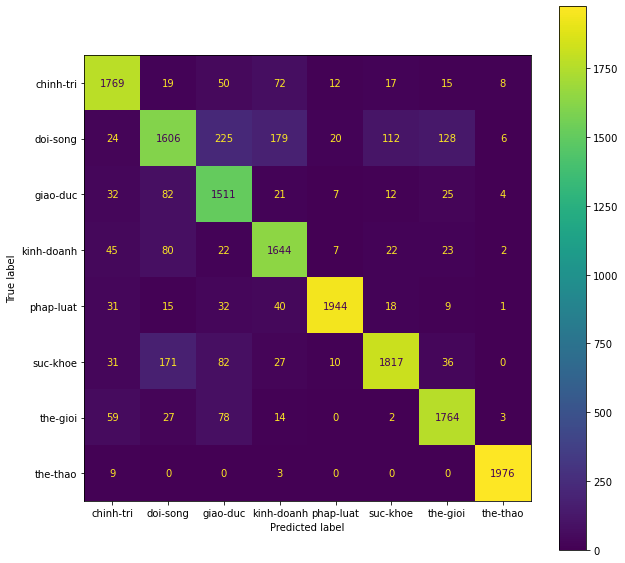

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
dis.plot(ax=ax)

In [ ]:
import pickle

In [ ]:
with open('bayes_vectorizer.pk', 'wb') as fin:
    pickle.dump(tfidf_vect, fin)

In [ ]:
with open('svm_svd.p', 'wb') as fin:
    pickle.dump(svd, fin)

In [ ]:
with open('bayes_model.p', 'wb') as fin:
    pickle.dump(bayes, fin)